In [1]:
import sys, os, random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # filter out Tensorflow INFO & WARNINGS messages

import tensorflow as tf

SEED = 41
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print(f"Using Tensorflow {tf.__version__}")

Using Tensorflow 2.8.0


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)


In [3]:
from sklearn.model_selection import train_test_split

val_images, test_images, val_labels, test_labels = \
    train_test_split(test_images, test_labels, test_size=0.20, random_state=SEED)
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28) - test_labels.shape: (2000,)


In [4]:
# preprocess the images data
inp_shape = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape((train_images.shape[0], inp_shape))
train_images = train_images.astype("float32") / 255.0
val_images = val_images.reshape((val_images.shape[0], inp_shape))
val_images = val_images.astype("float32") / 255.0
test_images = test_images.reshape((test_images.shape[0], inp_shape))
test_images = test_images.astype("float32") / 255.0
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 784) - train_labels.shape: (60000,)
val_images.shape: (8000, 784) - val_labels.shape: (8000,)
test_images.shape: (2000, 784) - test_labels.shape: (2000,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [6]:
# Hyper parameters
EPOCHS = 25
BATCH_SIZE = 128
DROPOUT = 0.45

In [7]:
model = Sequential([
    Dense(256, input_shape=(inp_shape,)),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(256),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(10, input_shape=(inp_shape,)),
    Activation('softmax'),
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [8]:
hist = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
469/469 [==============================] - 7s 10ms/step - loss: 0.4263 - acc: 0.8691 - val_loss: 0.1467 - val_acc: 0.9551
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1949 - acc: 0.9416 - val_loss: 0.1102 - val_acc: 0.9674
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1513 - acc: 0.9547 - val_loss: 0.0946 - val_acc: 0.9709
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1304 - acc: 0.9614 - val_loss: 0.0843 - val_acc: 0.9745
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1129 - acc: 0.9654 - val_loss: 0.0785 - val_acc: 0.9760
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - acc: 0.9683 - val_loss: 0.0683 - val_acc: 0.9791
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0940 - acc: 0.9712 - val_loss: 0.0710 - val_acc: 0.9783
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0

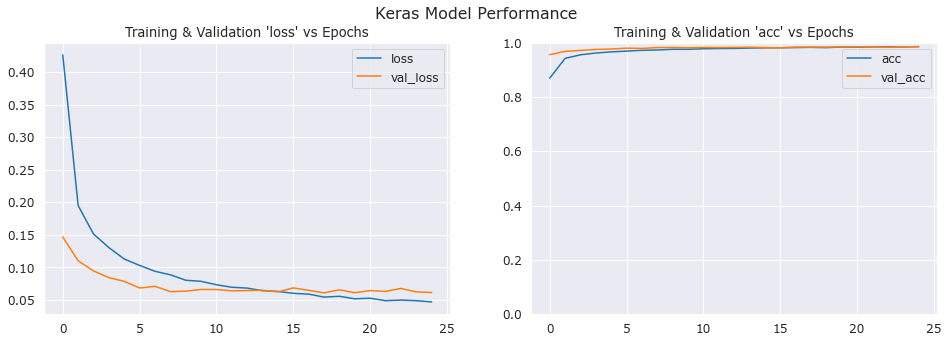

In [9]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric="acc", plot_title="Keras Model Performance")

In [10]:
print("Evaluating model")
loss, acc = model.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0088 - acc: 0.9977
  Training  -> loss: 0.009 - 0.998
250/250 [==============================] - 1s 5ms/step - loss: 0.0615 - acc: 0.9843
  Cross-val -> loss: 0.061 - 0.984
63/63 [==============================] - 0s 4ms/step - loss: 0.0681 - acc: 0.9815
  Testing   -> loss: 0.068 - 0.982


In [44]:
# run predictions on test data
test_labels_pred_proba = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

(array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3],
       dtype=uint8),
 array([2, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3]))

## Adding L2 Regularization to the model

In [45]:
from tensorflow.keras.regularizers import l2

L2_REG_FACTOR = 1e-5
l2_reg = l2(L2_REG_FACTOR)

In [46]:
model2 = Sequential([
    Dense(256, kernel_regularizer=l2_reg, input_shape=(inp_shape,)),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(256, kernel_regularizer=l2_reg),
    Activation('relu'),
    Dropout(rate=DROPOUT),
    Dense(10, input_shape=(inp_shape,)),
    Activation('softmax'),
])
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 activation_18 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)               

In [47]:
hist2 = model2.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 0.4272 - acc: 0.8719 - val_loss: 0.1546 - val_acc: 0.9549
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1999 - acc: 0.9424 - val_loss: 0.1161 - val_acc: 0.9638
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1609 - acc: 0.9550 - val_loss: 0.0977 - val_acc: 0.9716
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1383 - acc: 0.9614 - val_loss: 0.0923 - val_acc: 0.9728
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1254 - acc: 0.9643 - val_loss: 0.0883 - val_acc: 0.9755
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1134 - acc: 0.9690 - val_loss: 0.0800 - val_acc: 0.9793
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 0.1084 - acc: 0.9702 - val_loss: 0.0798 - val_acc: 0.9795
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0

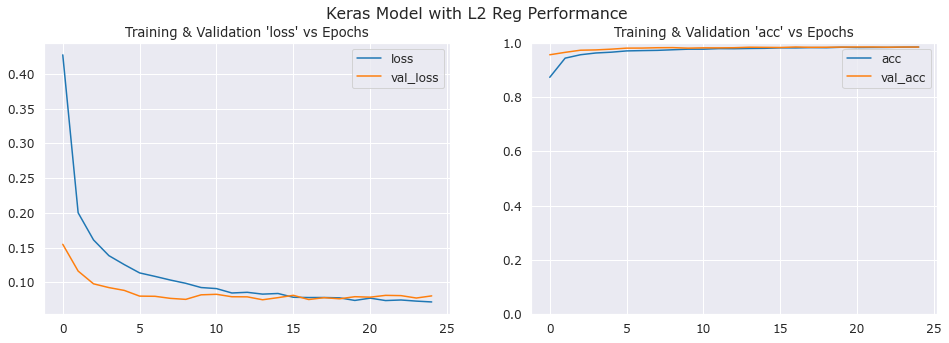

In [48]:
import kr_helper_funcs as kru

kru.show_plots(hist2.history, metric="acc", plot_title="Keras Model with L2 Reg Performance")

In [49]:
print("Evaluating model")
loss, acc = model2.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model2.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model2.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - acc: 0.9974
  Training  -> loss: 0.030 - 0.997
250/250 [==============================] - 1s 3ms/step - loss: 0.0804 - acc: 0.9833
  Cross-val -> loss: 0.080 - 0.983
63/63 [==============================] - 0s 2ms/step - loss: 0.0802 - acc: 0.9835
  Testing   -> loss: 0.080 - 0.984


In [50]:
# run predictions on test data
test_labels_pred_proba = model2.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

(array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3],
       dtype=uint8),
 array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3]))

## Using a CNN in the Model
In this section, we'll develop a classifier using CNN

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2

In [48]:
# load the data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)


In [49]:
from sklearn.model_selection import train_test_split

val_images, test_images, val_labels, test_labels = \
    train_test_split(test_images, test_labels, test_size=0.20, random_state=SEED)
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28) - test_labels.shape: (2000,)


In [50]:
# preprocess the images data
image_size = train_images.shape[1]
train_images = train_images.reshape([-1, image_size, image_size, 1])
train_images = train_images.astype("float32") / 255.0
val_images = val_images.reshape([-1, image_size, image_size, 1])
val_images = val_images.astype("float32") / 255.0
test_images = test_images.reshape([-1, image_size, image_size, 1])
test_images = test_images.astype("float32") / 255.0
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")


train_images.shape: (60000, 28, 28, 1) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28, 1) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28, 1) - test_labels.shape: (2000,)


In [51]:
INPUT_SHAPE = (image_size, image_size, 1)
EPOCHS = 25
BATCH_SIZE = 64
KERNEL_SIZE = 3
POOL_SIZE = 2
FILTERS = 64
DROPOUT = 0.2
NUM_CLASSES = 10

In [52]:
L2_REG_FACTOR = 1e-5
l2_reg = l2(L2_REG_FACTOR)


In [53]:
cnn_model = Sequential([
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu', 
           kernel_regularizer=l2_reg, input_shape=INPUT_SHAPE),
    MaxPooling2D(pool_size=POOL_SIZE),
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu',
           kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=POOL_SIZE),
    Conv2D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu',
           kernel_regularizer=l2_reg),
    MaxPooling2D(pool_size=POOL_SIZE),
    Flatten(),
    Dropout(DROPOUT),
    Dense(NUM_CLASSES, kernel_regularizer=l2_reg),
    Activation('softmax')
])
cnn_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 64)        

In [54]:
hist = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
    epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/25
938/938 [==============================] - 76s 79ms/step - loss: 0.2933 - acc: 0.9108 - val_loss: 0.0898 - val_acc: 0.9744
Epoch 2/25
938/938 [==============================] - 73s 78ms/step - loss: 0.1133 - acc: 0.9675 - val_loss: 0.0681 - val_acc: 0.9811
Epoch 3/25
938/938 [==============================] - 72s 77ms/step - loss: 0.0865 - acc: 0.9746 - val_loss: 0.0583 - val_acc: 0.9827
Epoch 4/25
938/938 [==============================] - 73s 78ms/step - loss: 0.0708 - acc: 0.9803 - val_loss: 0.0593 - val_acc: 0.9839
Epoch 5/25
938/938 [==============================] - 73s 77ms/step - loss: 0.0617 - acc: 0.9828 - val_loss: 0.0487 - val_acc: 0.9869
Epoch 6/25
938/938 [==============================] - 71s 76ms/step - loss: 0.0558 - acc: 0.9845 - val_loss: 0.0454 - val_acc: 0.9872
Epoch 7/25
938/938 [==============================] - 71s 76ms/step - loss: 0.0501 - acc: 0.9860 - val_loss: 0.0504 - val_acc: 0.9866
Epoch 8/25
938/938 [==============================] - 72s 76ms

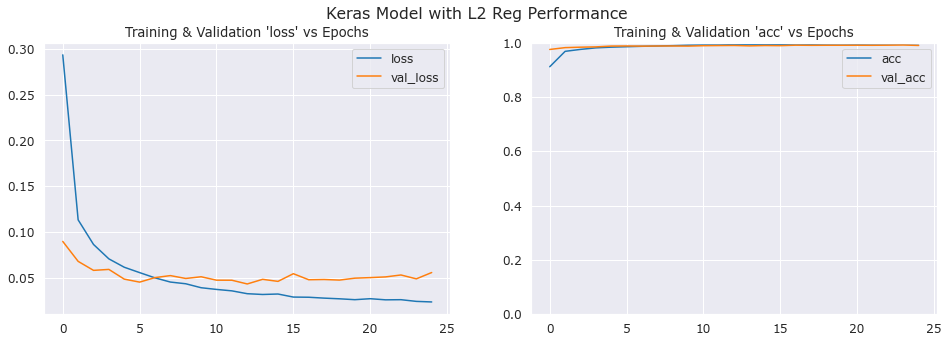

In [55]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric="acc", plot_title="Keras Model with L2 Reg Performance")

In [56]:
print("Evaluating model")
loss, acc = cnn_model.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = cnn_model.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = cnn_model.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0151 - acc: 0.9989
  Training  -> loss: 0.015 - 0.999
250/250 [==============================] - 3s 10ms/step - loss: 0.0559 - acc: 0.9891
  Cross-val -> loss: 0.056 - 0.989
63/63 [==============================] - 1s 10ms/step - loss: 0.0622 - acc: 0.9880
  Testing   -> loss: 0.062 - 0.988


In [57]:
# run predictions on test data
test_labels_pred_proba = cnn_model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

(array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3],
       dtype=uint8),
 array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3]))